In [1]:
import pandas as pd
import numpy as np
import phate
import scprep
import magic

import matplotlib.pyplot as plt
import seaborn as sns

import time

# matplotlib settings for Jupyter notebooks only
%matplotlib inline

sns.set_style('ticks')

### Treutlein fibroblast data

Dataset containing trans-differentiating fibroblasts from [Treutlein et al. _Nature_. 2016](http://doi.org/10.1038/nature18323). 

In [2]:
data = pd.read_csv('/home/dan/scRNAseq/Treutlein.counts.csv', index_col=0)
expression = pd.read_csv('/home/dan/scRNAseq/Treutlein.expression.csv', index_col=0)

In [3]:
print(expression.shape)
expression.head()


(392, 2000)


,Hmgb3,Tmem30a,Bloc1s2,Pdcl3,Lyar,Ctsa,Zfp422,Vamp7,Fam114a1,Stmn3,...,Mylpf,Tnnt2,Acta2,S100a6,Pgam2,Tnnc1,Tnni1,Myl1,Tnnc2,Acta1
1_iN1_C01,7.741435,1.795690,0.000000,7.341851,0.000000,6.090298,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,7.340894,7.275953,0.00000,0.000000,5.125307,0.0,0.000000
1_iN1_C02,4.880207,0.000000,0.000000,3.004187,2.383451,5.395503,6.199371,6.619480,2.135299,0.0,...,0.0,6.471605,4.809379,9.547748,10.265516,8.96431,0.000000,0.000000,0.0,0.000000
1_iN1_C03,2.464102,4.273003,4.019464,1.804309,0.000000,5.430379,0.000000,0.000000,0.000000,0.0,...,0.0,8.493459,0.150616,6.803000,6.231534,0.00000,1.641874,0.000000,0.0,0.000000
1_iN1_C04,0.000000,0.000000,0.000000,7.389080,5.182950,5.322356,0.000000,0.000000,6.769139,0.0,...,0.0,0.000000,10.419956,13.351129,0.000000,4.51147,0.000000,0.000000,0.0,0.070281
1_iN1_C05,2.087070,0.000000,2.857140,6.667093,4.649816,5.217366,3.211770,1.457797,6.506859,0.0,...,0.0,1.598253,9.378349,10.178032,5.664535,6.36210,0.000000,0.000000,0.0,0.000000


In [4]:
metadata = pd.read_csv('/home/dan/scRNAseq/Treutlein.groups.csv', index_col=0)
metadata.columns = pd.Index(['cluster'])

In [5]:
from sklearn.decomposition import PCA

In [6]:
data_pca = PCA(2).fit_transform(expression)

In [7]:
phate_op = phate.PHATE(knn=5, n_jobs=-2)

data_phate = phate_op.fit_transform(expression)
data_phate = pd.DataFrame(data_phate, index=data.index)

Calculating PHATE...
  Running PHATE on 392 cells and 2000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.15 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.22 seconds.
  Calculating optimal t...
    Automatically selected t = 17
  Calculated optimal t in 0.05 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 1.84 seconds.
Calculated PHATE in 2.13 seconds.


In [8]:
clusts = phate.cluster.kmeans(phate_op, n_clusters=5)

In [9]:
pd.DataFrame(['cluster{}'.format(c) for c in clusts], columns=['clusters']).to_csv('/home/dan/scRNAseq/Treutlein.phate_clusters.csv')


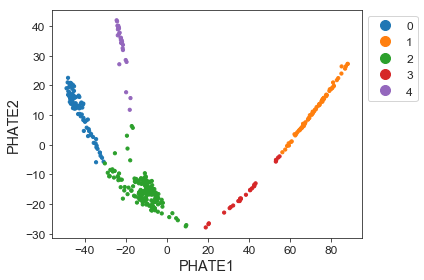

In [10]:
scprep.plot.scatter2d(data_phate, c=clusts, legend_anchor=(1,1), 
                     label_prefix='PHATE')

In [22]:
pseudotime, curves = scprep.run.slingshot.Slingshot(expression.values, clusts, data_phate.values)

 num [1:2000, 1:392] 7.74 1.8 0 7.34 0 ...
NULL
 num [1:392, 1:2] -6.44 -1.94 -8.35 42.55 35.69 ...
NULL
 Factor w/ 5 levels "0","1","2","3",..: 3 3 3 4 4 3 4 3 3 4 ...
NULL


R[write to console]: Using full covariance matrix


(array([[1.11699528e+02, 1.11376761e+02],
        [1.07866107e+02, 1.06921641e+02],
        [1.15825867e+02,            nan],
        [6.11424576e+01, 6.11030140e+01],
        [6.94231861e+01, 6.92076549e+01],
        [1.14675524e+02,            nan],
        [6.38523360e+01, 6.36946892e+01],
        [9.61506924e+01,            nan],
        [1.10631404e+02, 1.09557012e+02],
        [6.27232979e+01, 6.25962411e+01],
        [1.03339312e+02,            nan],
        [1.15164095e+02,            nan],
        [1.15197043e+02, 1.14650529e+02],
        [1.14297095e+02, 1.13226453e+02],
        [6.16171490e+01, 6.14855157e+01],
        [1.13663715e+02, 1.12901694e+02],
        [8.61229126e+01,            nan],
        [1.13627762e+02, 1.12500186e+02],
        [7.46244933e+01, 7.42340879e+01],
        [1.08827768e+02, 1.08045043e+02],
        [1.11308612e+02, 1.09849355e+02],
        [4.55607019e+01, 4.55601507e+01],
        [1.15704908e+02,            nan],
        [4.36256776e+01, 4.3627567

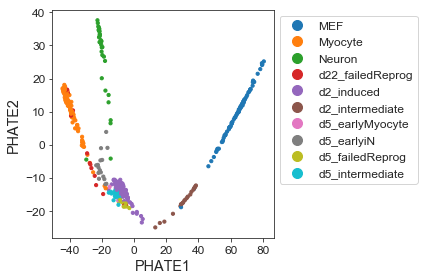

In [100]:
scprep.plot.scatter2d(data_phate, c=metadata['cluster'], legend_anchor=(1,1), 
                     label_prefix='PHATE')

In [99]:
data_phate.to_csv('/home/dan/scRNAseq/Treutlein.phate.csv', index=False)

In [98]:
np.savetxt('/home/dan/scRNAseq/Treutlein.phate.csv', data_phate.values, fmt='%.8f', delimiter=',') 

In [17]:
slingshot_pt = pd.read_csv('/home/dan/scRNAseq/Treutlein.slingPseudotime.csv', index_col=0)

In [ ]:
scprep.plot.scatter2d(data_phate, c=metadata['cluster'], legend_anchor=(1,1), 
                     label_prefix='PHATE')



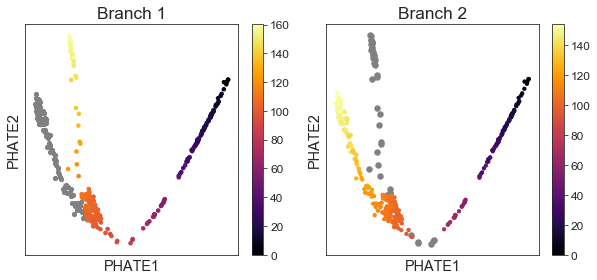

In [18]:
fig, axes = plt.subplots(1,2, figsize=(8.5,4))

for i, ax in enumerate(axes):
    curr_pseudotime = slingshot_pt.iloc[:,i].values
    m = ~pd.isnull(curr_pseudotime)
    # plot null points as grey
    scprep.plot.scatter2d(data_phate[~m], color='grey',  
                          ax=ax)    
    # plot points on branch
    scprep.plot.scatter2d(data_phate[m], c=curr_pseudotime[m],
                         label_prefix='PHATE', ticks=None,
                          title='Branch {}'.format(i + 1),
                          ax=ax)
    
fig.tight_layout()

In [24]:
curves

array([[[ 88.23890403,  27.05042101],
        [ 88.18598563,  26.99881475],
        [ 87.38382258,  26.21654432],
        ...,
        [-23.95969405,  40.17054165],
        [-24.11872277,  41.61820318],
        [-24.16157477,  42.00827658]],

       [[ 88.23890403,  27.05042101],
        [ 88.18598602,  26.99881513],
        [ 87.38382547,  26.21654713],
        ...,
        [-50.34302539,  22.13515114],
        [-51.06962836,  23.1948308 ],
        [-51.3133117 ,  23.55021921]]])

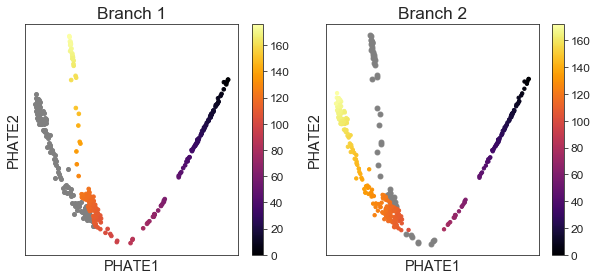

In [23]:
fig, axes = plt.subplots(1,2, figsize=(8.5,4))

for i, ax in enumerate(axes):
    curr_pseudotime = pseudotime[:,i]
    m = ~pd.isnull(curr_pseudotime)
    # plot null points as grey
    scprep.plot.scatter2d(data_phate[~m], color='grey',  
                          ax=ax)    
    # plot points on branch
    scprep.plot.scatter2d(data_phate[m], c=curr_pseudotime[m],
                         label_prefix='PHATE', ticks=None,
                          title='Branch {}'.format(i + 1),
                          ax=ax)
    
fig.tight_layout()

#### PHATE vs UMAP

Calculating PHATE...
  Running PHATE on 392 cells and 2000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.04 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.08 seconds.
  Calculating optimal t...
    Automatically selected t = 17
  Calculated optimal t in 0.03 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.29 seconds.
Calculated PHATE in 0.41 seconds.


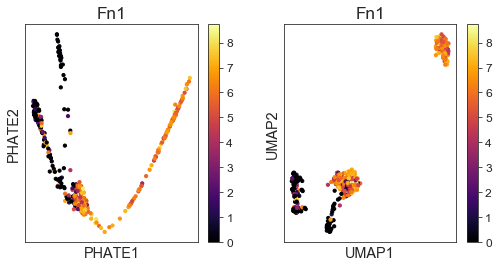

In [191]:
fig, axes = plt.subplots(1,2, figsize=(8.5,4))


data_phate = phate.PHATE().fit_transform(expression)
data_umap = umap.UMAP().fit_transform(expression)
scprep.plot.scatter2d(data_phate, c=expression['Fn1'],
                     label_prefix='PHATE', ticks=None,
                      title='Fn1', ax=axes[0])


scprep.plot.scatter2d(data_umap, c=expression['Fn1'],
                     label_prefix='UMAP', ticks=None,
                      title='Fn1', ax=axes[1])

#### Visualizing gene-gene relationships

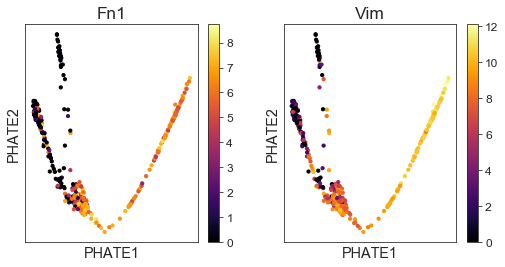

In [192]:
fig, axes = plt.subplots(1,2, figsize=(8.5,4))


scprep.plot.scatter2d(data_phate, c=expression['Fn1'],
                     label_prefix='PHATE', ticks=None,
                      title='Fn1', ax=axes[0])


scprep.plot.scatter2d(data_phate, c=expression['Vim'],
                     label_prefix='PHATE', ticks=None,
                      title='Vim', ax=axes[1])

In [139]:
import scipy

#### Genes with the strongest association with pseudotime

In [140]:
dremi_scores = np.zeros(expression.shape[1])
pearsorn_r = np.zeros(expression.shape[1])

pseudotime = slingshot_pt.mean(axis=1)
for i, gene in enumerate(expression):
    dremi_scores[i] = scprep.stats.knnDREMI(pseudotime, expression[gene])
    pearsorn_r[i] = scipy.stats.pearsonr(pseudotime, expression[gene])[0]

#### Genes that differentiate branch 1 from branch 2

In [319]:
branch1 = ~pd.isnull(slingshot_pt.iloc[:,0].values)
branch2 = ~pd.isnull(slingshot_pt.iloc[:,1].values)

branch0 = branch1 & branch2

In [320]:
dremi_branch0 = np.zeros(expression.shape[1])
dremi_branch1 = np.zeros(expression.shape[1])
dremi_branch2 = np.zeros(expression.shape[1])

expression_branch0 = expression.loc[branch0]
expression_branch1 = expression.loc[branch1]
expression_branch2 = expression.loc[branch2]

pseudotime_branch0 = slingshot_pt.loc[branch0].mean(axis=1)
pseudotime_branch1 = slingshot_pt.loc[branch1]['curve1']
pseudotime_branch2 = slingshot_pt.loc[branch2]['curve2']

for i, gene in enumerate(expression):
    dremi_branch0[i] = scprep.stats.knnDREMI(pseudotime_branch0, expression_branch0[gene])
    dremi_branch1[i] = scprep.stats.knnDREMI(pseudotime_branch1, expression_branch1[gene])
    dremi_branch2[i] = scprep.stats.knnDREMI(pseudotime_branch2, expression_branch2[gene])

In [ ]:
diff = dremi_branch1 - dremi_branch2

In [316]:
branch0_genes = expression.columns[np.argsort(dremi_branch0)[::-1][:30]]
branch1_genes = expression.columns[np.argsort(diff)[::-1][:10]]
branch2_genes = expression.columns[np.argsort(diff)[:10]]

interesting_genes = np.concatenate([branch0_genes, branch1_genes, branch2_genes])

In [359]:
pseudotime_order = np.zeros(expression.shape[0], dtype=int)
raw_indices = np.arange(expression.shape[0], dtype=int)

block_masks = [branch0, (branch1 & ~branch2), (branch2 & ~branch1)]

block_start = 0
for block_mask in block_masks:
    block_len = np.sum(block_mask)
    block_end = block_start + block_len
    pseudotime_order[block_start:block_end] = raw_indices[block_mask][np.argsort(slingshot_pt.loc[block_mask].sum(axis=1))]
    block_start = block_end



In [372]:
uniq_clusters = np.unique(clusts)
cmap = {cl:plt.cm.Set1(np.arange(len(uniq_clusters)))[i] for i, cl in enumerate(uniq_clusters)}

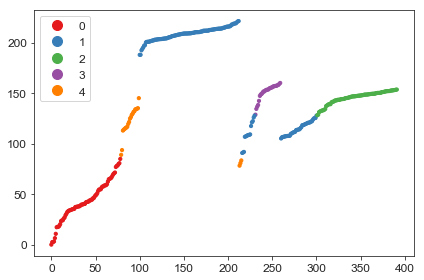

In [374]:
scprep.plot.scatter(np.arange(expression.shape[0]), slingshot_pt.iloc[pseudotime_order].sum(axis=1), c=clusts[pseudotime_order], cmap=cmap)

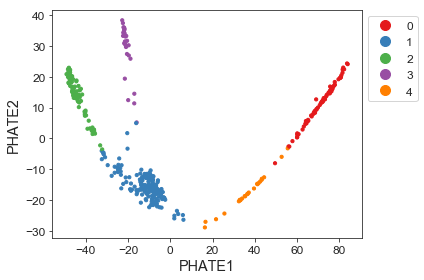

In [369]:
scprep.plot.scatter2d(data_phate, c=clusts, cmap=cmap, legend_anchor=(1,1), 
                     label_prefix='PHATE')

In [ ]:
1

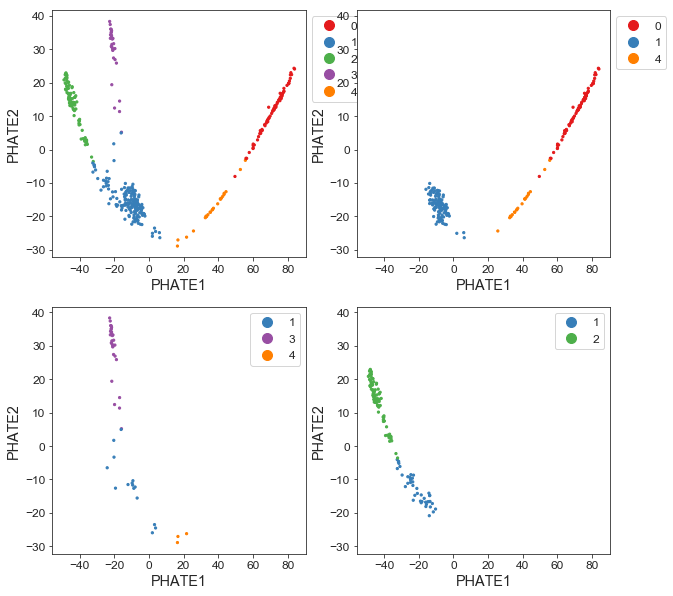

In [380]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.flatten()
ax = scprep.plot.scatter2d(data_phate, c=clusts, s=5,
                           legend_anchor=(1,1), 
                     label_prefix='PHATE', cmap=cmap, ax=axes[0])

lim = ax.get_xlim(), ax.get_ylim()


for i, m in enumerate([branch0, (branch1 & ~branch2), (branch2 & ~branch1)]):
    ax = scprep.plot.scatter2d(data_phate.loc[m], c=clusts[m], s=5,
                               legend_anchor=(1,1), 
                     label_prefix='PHATE', cmap=cmap, ax=axes[i + 1])
    ax.set_xlim(lim[0])
    ax.set_ylim(lim[1])
    




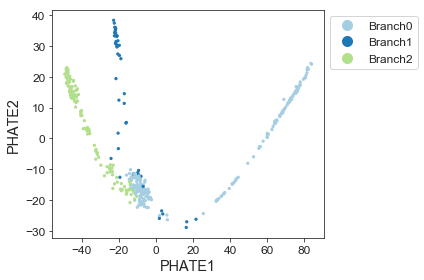

In [393]:
scprep.plot.scatter2d(data_phate, c=branch_assignment,cmap=branch_cmap, s=5,
                           legend_anchor=(1,1), 
                     label_prefix='PHATE')


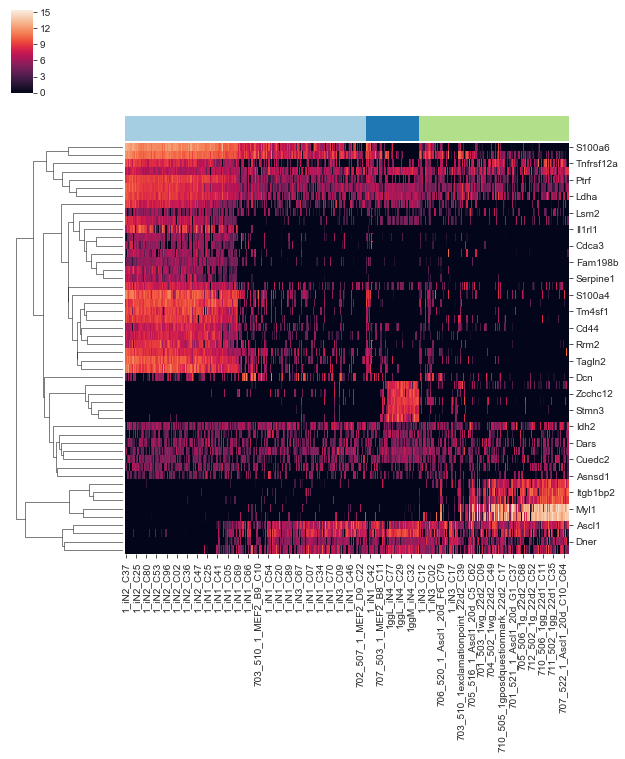

In [391]:
branch_assignment = np.zeros(expression.shape[0], dtype=object)

branch_cmap = {'Branch0':'#a6cee3', 'Branch1':'#1f78b4', 'Branch2':'#b2df8a'}
names = ['Branch0', 'Branch1', 'Branch2']
for i, m in enumerate(block_masks):
    branch_assignment[m] = names[i]
    
col_colors = np.array([branch_cmap[b] for b in branch_assignment])

cg = sns.clustermap(expression.iloc[pseudotime_order][interesting_genes].T, 
               col_colors=col_colors[pseudotime_order], col_cluster=False)

cg.savefig('../img/')

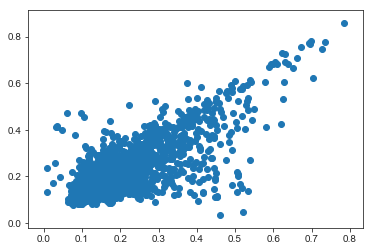

In [294]:
plt.scatter(aa, dremi_branch2)

In [299]:
diff = np.abs(dremi_branch1 - dremi_branch2)

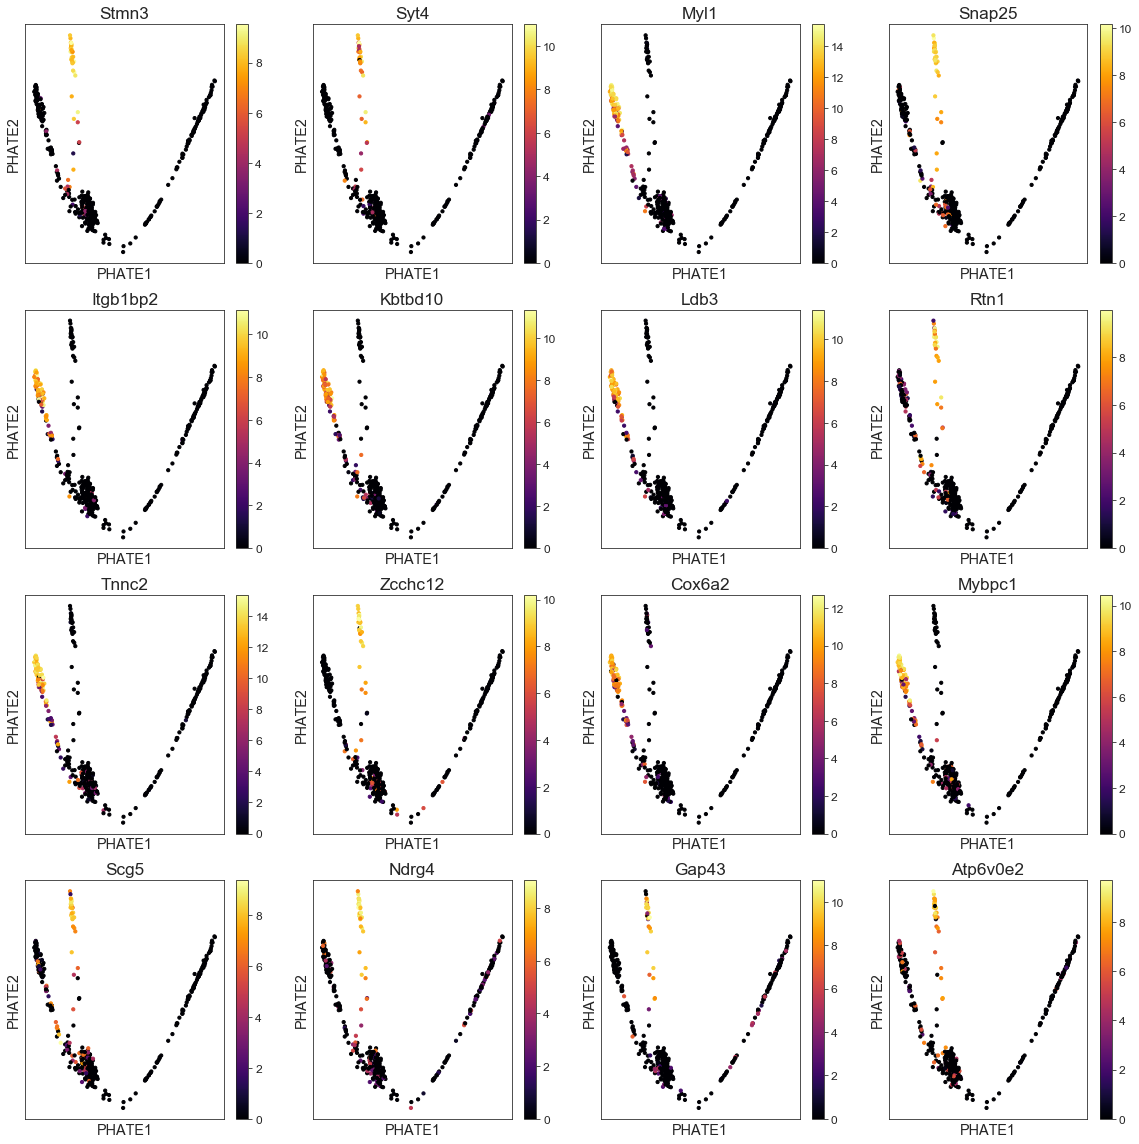

In [301]:
fig, axes  = plt.subplots(4,4, figsize=(16,16))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(diff)[::-1][i]
    exp = expression.iloc[:,gene_ix]
    scprep.plot.scatter2d(data_phate, c=exp, 
                          ticks=False, title=exp.name, 
                          label_prefix='PHATE', ax=ax)
    
fig.tight_layout()

In [136]:
top_genes = np.argsort(dremi_scores)[::-1]

genes = top_genes[:50]

exp = expression.iloc[np.argsort(slingshot_pt.mean(axis=1)), genes]

sns.clustermap(exp.T, col_cluster=False)

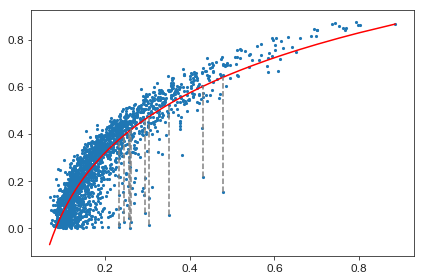

In [188]:
ix = np.argsort(dremi_scores)
x = dremi_scores[ix]
y = np.abs(pearson_r[ix])
a, b = np.polyfit(np.log(x), y, 1)
ax = scprep.plot.scatter(x, y)

y_p = a* np.log(x) + b
ax.plot(x, y_p, c='red')

residuals = y - y_p

for i in np.argsort(residuals)[:10]:
    ax.plot([x[i], x[i]], [y[i], y_p[i]], c='grey', linestyle='--')


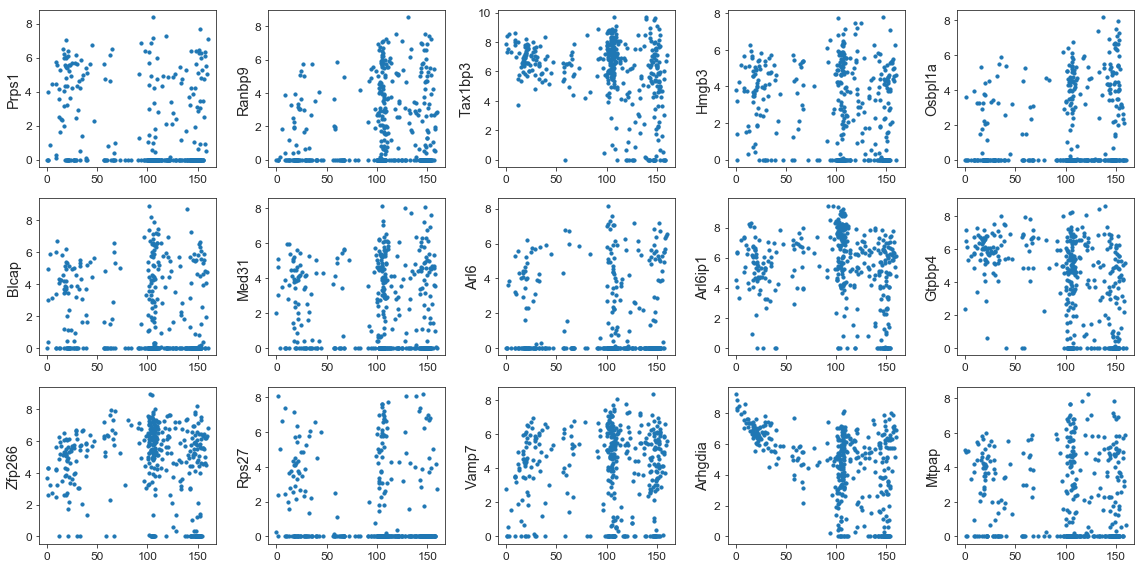

In [186]:
fig, axes  = plt.subplots(3,5, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(residuals)[::-1][i]
    
    scprep.plot.scatter(pseudotime, expression.iloc[:,gene_ix], ax=ax)
    
fig.tight_layout()

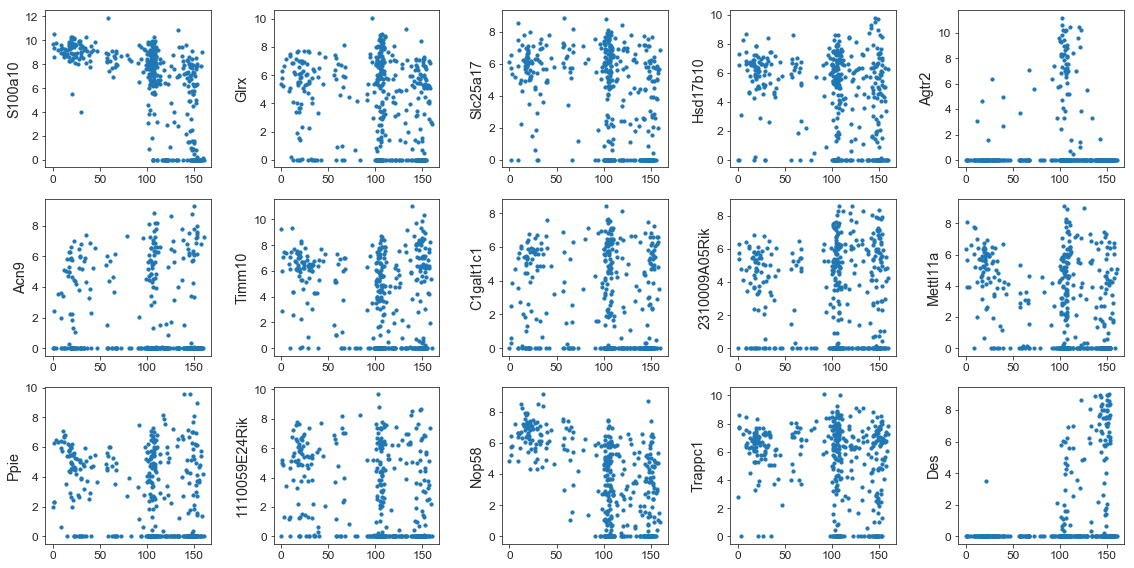

In [187]:
fig, axes  = plt.subplots(3,5, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(residuals)[i]
    
    scprep.plot.scatter(pseudotime, expression.iloc[:,gene_ix], ax=ax)
    
fig.tight_layout()

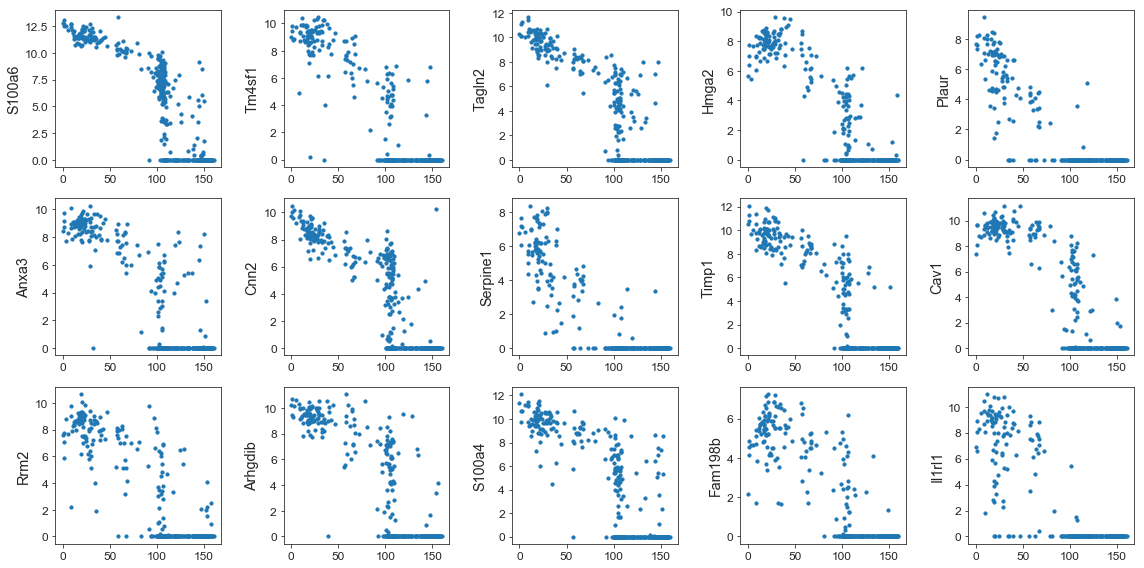

In [185]:
fig, axes  = plt.subplots(3,5, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(dremi_scores)[::-1][i]
    
    scprep.plot.scatter(pseudotime, expression.iloc[:,gene_ix], ax=ax)
    
fig.tight_layout()

### Diffusion pseudotime

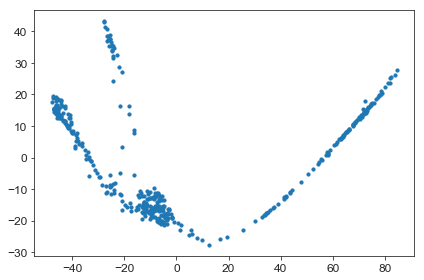

In [193]:
ax = scprep.plot.scatter2d(data_phate)


In [196]:
np.argmax(data_phate[:,0])

0

In [205]:
import anndata, scanpy

adata = anndata.AnnData(expression)

adata.uns['iroot'] = np.argmax(data_phate[:,0])

scanpy.pp.pca(adata)
scanpy.pp.neighbors(adata)
scanpy.tl.diffmap(adata)
scanpy.tl.dpt(adata)

dpt = adata.obs['dpt_pseudotime']

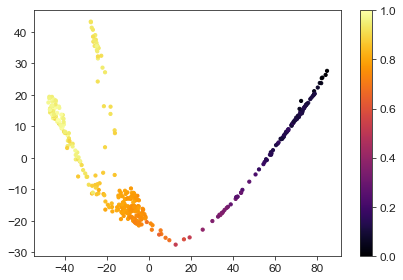

In [206]:
ax = scprep.plot.scatter2d(data_phate, c=dpt)


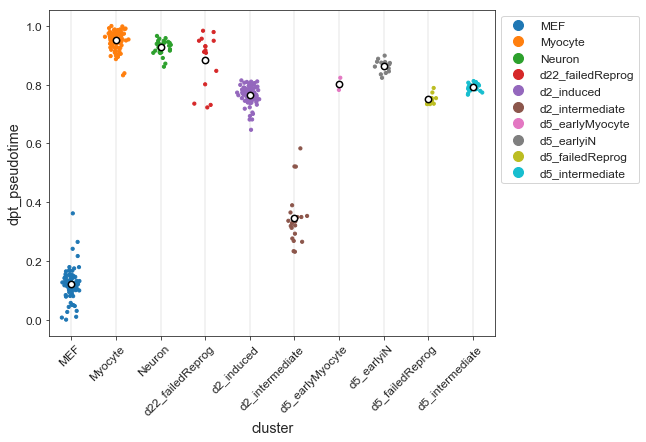

In [199]:
fig, ax = plt.subplots(1, figsize=(8,6))
scprep.plot.jitter(metadata['cluster'], dpt, c=metadata['cluster'],
                   means_s=40, means_c='white',
                   legend_anchor=(1,1), ax=ax)

xticks = ax.get_xticklabels()
ax.set_xticklabels(xticks, rotation=45, ha='right')
scprep.plot.utils.shift_ticklabels(ax.xaxis, dx=0.15)

In [227]:
dremi_scores = np.zeros(expression.shape[1])
pearsorn_r = np.zeros(expression.shape[1])

pseudotime = dpt
for i, gene in enumerate(expression):
    dremi_scores[i] = scprep.stats.knnDREMI(pseudotime, expression[gene])
    pearsorn_r[i] = scipy.stats.pearsonr(pseudotime, expression[gene])[0]

In [238]:
dremi_magic = np.zeros(expression.shape[1])
pearson_magic = np.zeros(expression.shape[1])
pseudotime = dpt
for i, gene in enumerate(expression):
    dremi_magic[i] = scprep.stats.knnDREMI(pseudotime, data_magic[gene])
    pearson_magic[i] = scipy.stats.pearsonr(pseudotime, expression[gene])[0]

In [233]:
np.intersect1d(np.argsort(dremi_magic[::-1])[:50], np.argsort(dremi_scores[::-1])[:50])

array([1902])

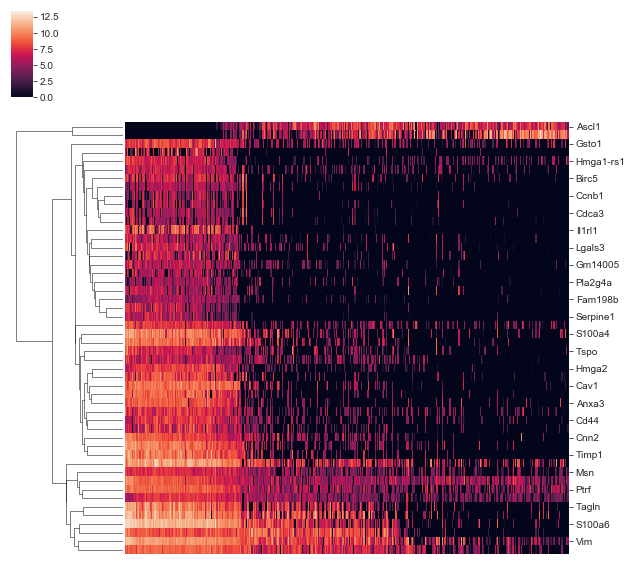

In [284]:
top_genes = np.argsort(dremi_scores)[::-1]
genes = top_genes[:50]

exp = expression.iloc[np.argsort(pseudotime), genes]
sns.clustermap(exp.T, col_cluster=False, xticklabels=[])

In [280]:
metadata['cluster'].unique()

array(['d2_induced', 'd2_intermediate', 'MEF', 'd5_earlyMyocyte',
       'd5_intermediate', 'd5_earlyiN', 'd5_failedReprog', 'Neuron',
       'Myocyte', 'd22_failedReprog'], dtype=object)

In [279]:
np.isin(metadata['cluster'], ['Neuron', 'Myocyte']).sum()

121

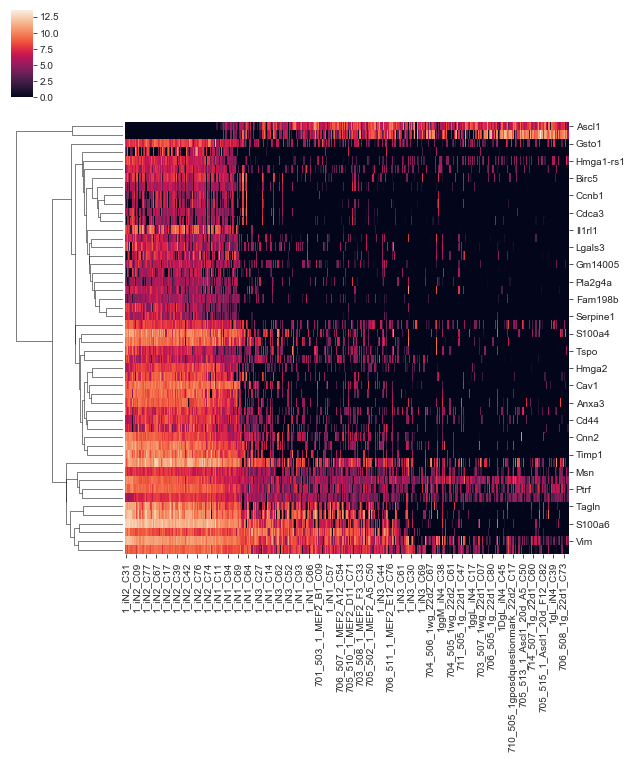

In [281]:
top_genes = np.argsort(dremi_scores)[::-1]
genes = top_genes[:50]

exp = expression.iloc[np.argsort(pseudotime), genes]
sns.clustermap(exp.T, col_cluster=False)

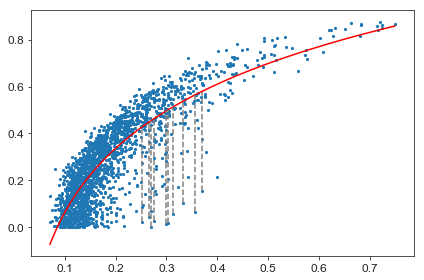

In [239]:
ix = np.argsort(dremi_scores)
x = dremi_scores[ix]
y = np.abs(pearson_r[ix])
a, b = np.polyfit(np.log(x), y, 1)
ax = scprep.plot.scatter(x, y)

y_p = a* np.log(x) + b
ax.plot(x, y_p, c='red')

residuals = y - y_p

for i in np.argsort(residuals)[:10]:
    ax.plot([x[i], x[i]], [y[i], y_p[i]], c='grey', linestyle='--')


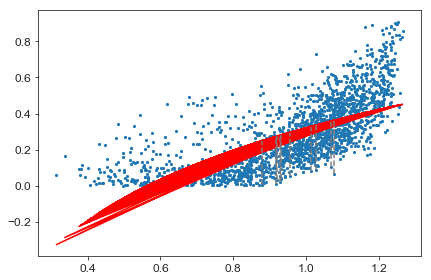

In [240]:
ix = np.argsort(dremi_scores)
x = dremi_magic[ix]
y = np.abs(pearson_magic[ix])
a, b = np.polyfit(np.log(x), y, 1)
ax = scprep.plot.scatter(x, y)

y_p = a* np.log(x) + b
ax.plot(x, y_p, c='red')

residuals = y - y_p

for i in np.argsort(residuals)[:10]:
    ax.plot([x[i], x[i]], [y[i], y_p[i]], c='grey', linestyle='--')


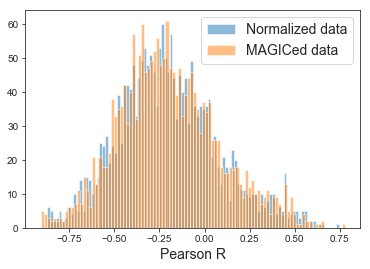

In [263]:
plt.hist(pearson_r, bins=100,alpha=0.5     , label='Normalized data')
plt.hist(pearson_magic, bins=100, alpha=0.5, label='MAGICed data')

plt.xlabel('Pearson R',fontsize=14)
plt.legend(fontsize=14)

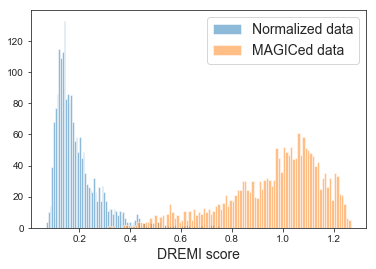

In [262]:
plt.hist(dremi_scores, bins=100,alpha=0.5, label='Normalized data')
plt.hist(dremi_magic, bins=100, alpha=0.5, label='MAGICed data')
plt.xlabel('DREMI score',fontsize=14)
plt.legend(fontsize=14)

Text(0.5, 0, 'L1-norm per cell')

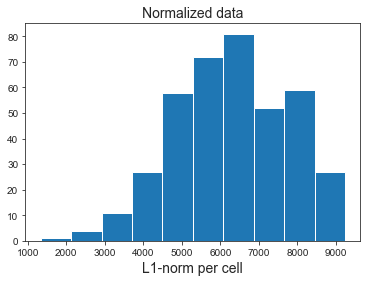

In [266]:
plt.hist(expression.sum(axis=1))
plt.title('Normalized data',fontsize=14)
plt.xlabel('L1-norm per cell',fontsize=14)

Text(0.5, 0, 'L1-norm per cell')

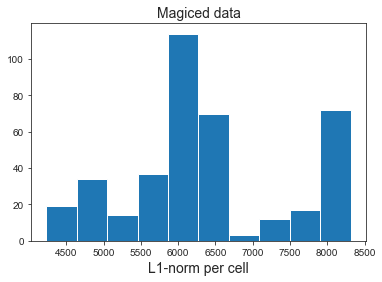

In [267]:
plt.hist(data_magic.sum(axis=1))
plt.title('Magiced data',fontsize=14)
plt.xlabel('L1-norm per cell',fontsize=14)

In [255]:
import magic
data_magic = magic.MAGIC(t=4).fit_transform(expression)

Calculating MAGIC...
  Running MAGIC on 392 cells and 2000 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.05 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.09 seconds.
  Calculating imputation...
Calculated MAGIC in 0.11 seconds.


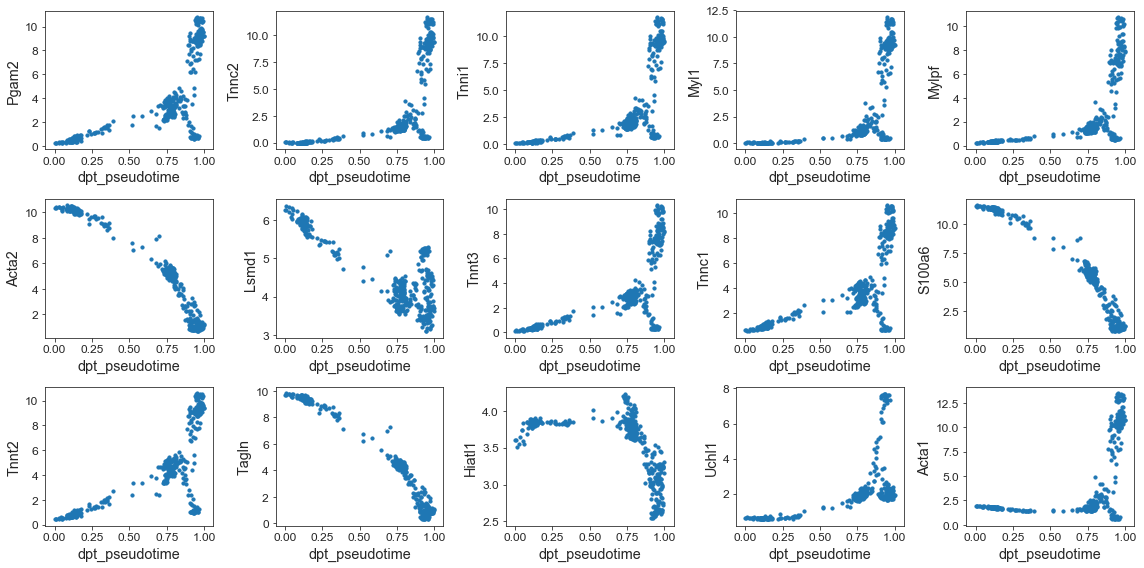

In [258]:
fig, axes  = plt.subplots(3,5, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(residuals)[::-1][i]
    
    scprep.plot.scatter(pseudotime, data_magic.iloc[:,gene_ix], ax=ax)
    
fig.tight_layout()

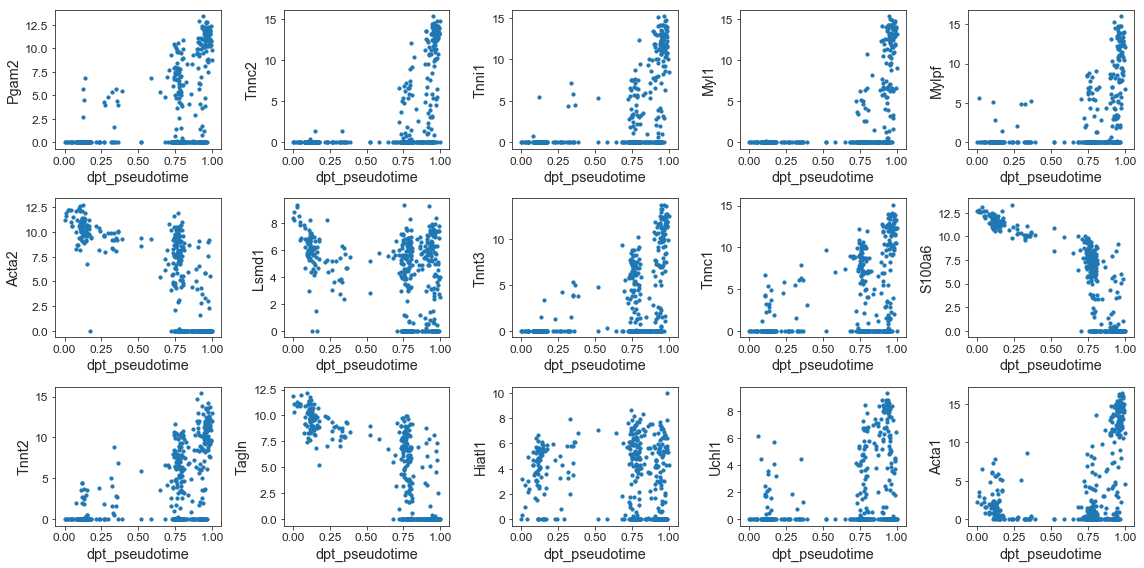

In [259]:
fig, axes  = plt.subplots(3,5, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(residuals)[::-1][i]
    
    scprep.plot.scatter(pseudotime, expression.iloc[:,gene_ix], ax=ax)
    
fig.tight_layout()

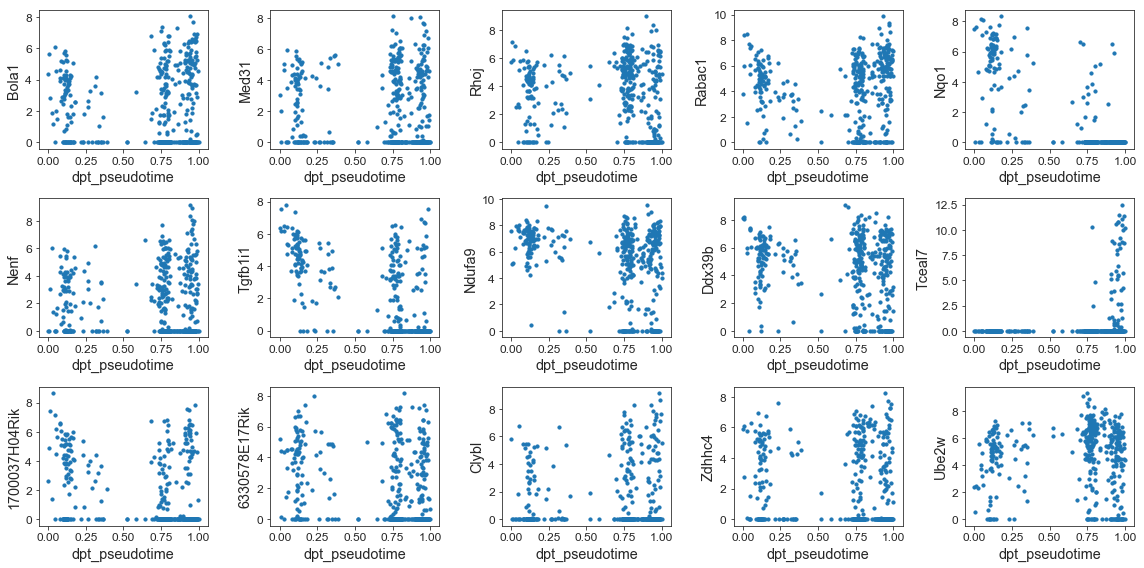

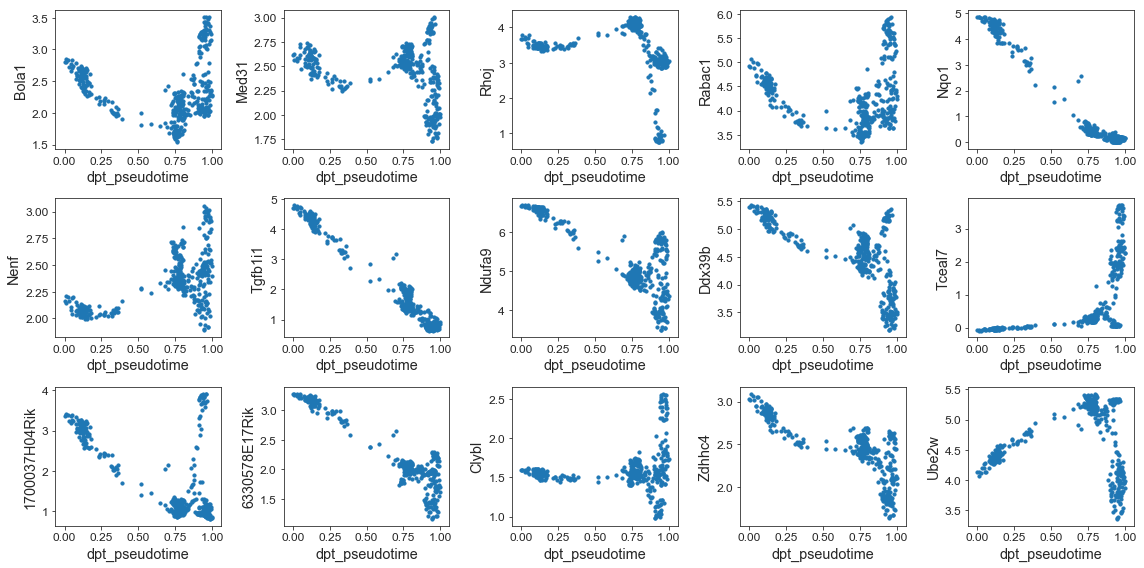

In [260]:


fig, axes  = plt.subplots(3,5, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(residuals)[i]
    
    scprep.plot.scatter(pseudotime, expression.iloc[:,gene_ix], ax=ax)
    
fig.tight_layout()


fig, axes  = plt.subplots(3,5, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(residuals)[i]
    
    scprep.plot.scatter(pseudotime, data_magic.iloc[:,gene_ix], ax=ax)
    
fig.tight_layout()

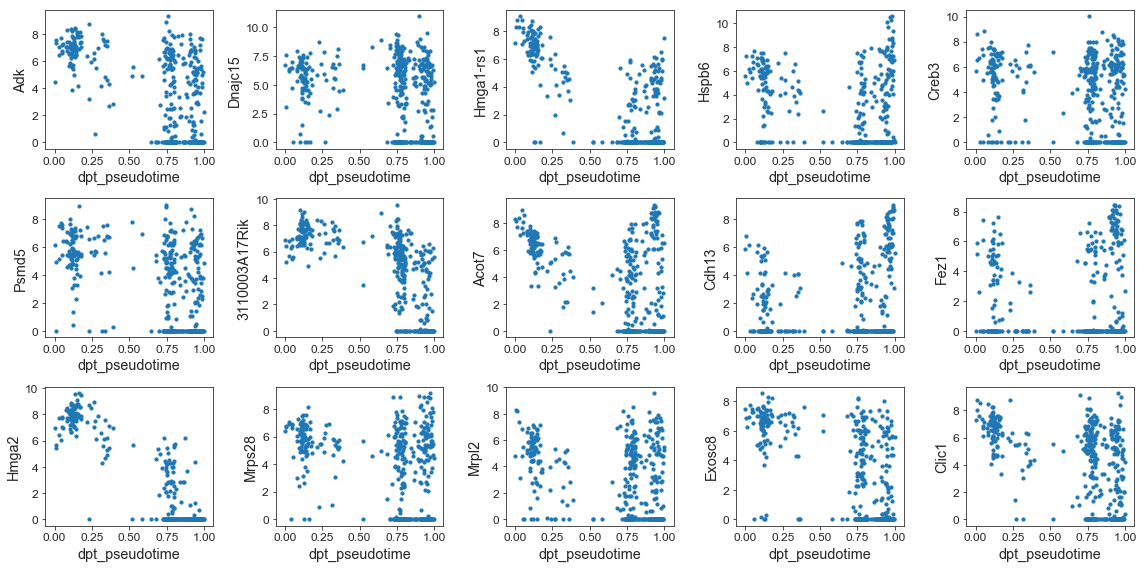

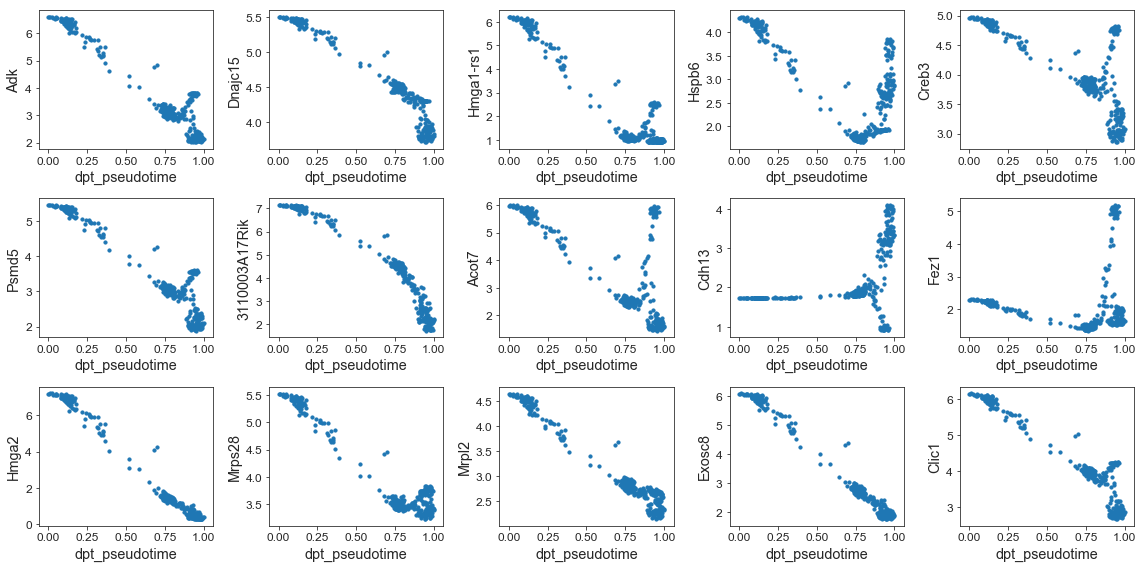

In [217]:


fig, axes  = plt.subplots(3,5, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(residuals)[i]
    
    scprep.plot.scatter(pseudotime, expression.iloc[:,gene_ix], ax=ax)
    
fig.tight_layout()


fig, axes  = plt.subplots(3,5, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(residuals)[i]
    
    scprep.plot.scatter(pseudotime, data_magic.iloc[:,gene_ix], ax=ax)
    
fig.tight_layout()

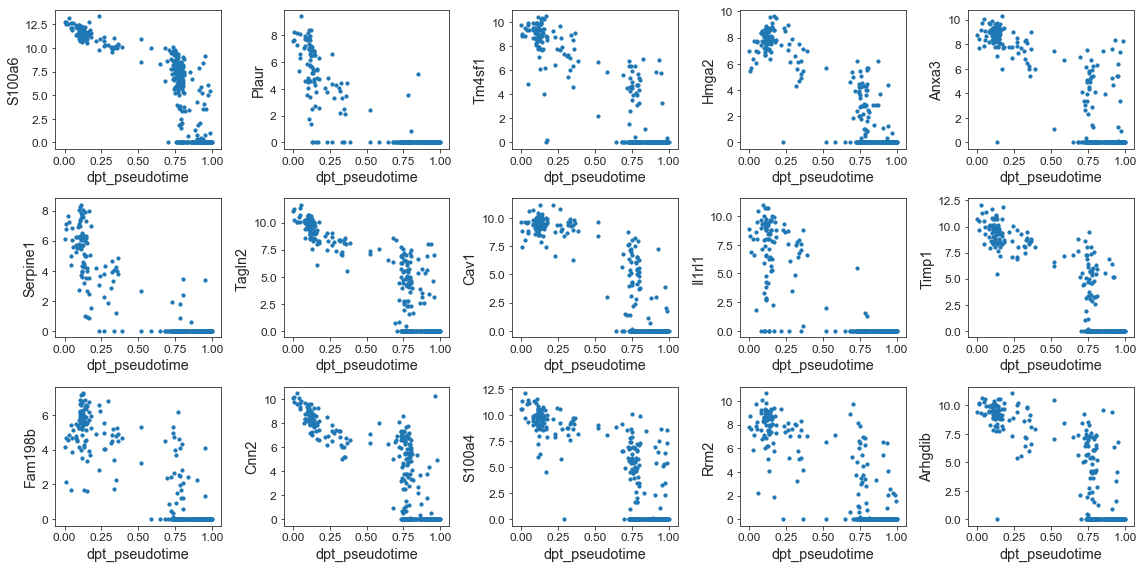

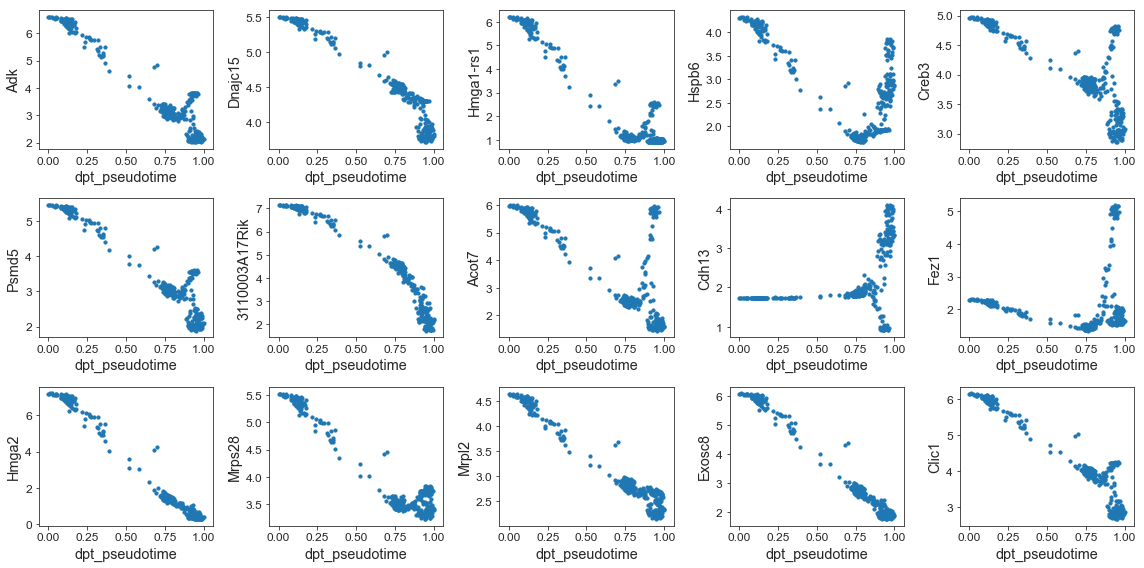

In [218]:
fig, axes  = plt.subplots(3,5, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(dremi_scores)[::-1][i]
    
    scprep.plot.scatter(pseudotime, expression.iloc[:,gene_ix], ax=ax)
    
fig.tight_layout()


fig, axes  = plt.subplots(3,5, figsize=(16,8))

for i, ax in enumerate(axes.flatten()):
    gene_ix = np.argsort(residuals)[i]
    
    scprep.plot.scatter(pseudotime, data_magic.iloc[:,gene_ix], ax=ax)
    
fig.tight_layout()

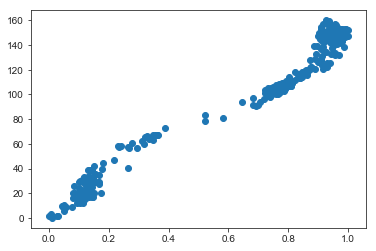

In [209]:
plt.scatter(dpt, slingshot_pt.mean(axis=1))

In [27]:
full_marker_genes = ['ARID3A (ENSG00000116017)', 'ASCL2 (ENSG00000183734)',  'CD34 (ENSG00000174059)',
 'CDX2 (ENSG00000165556)', 'CER1 (ENSG00000147869)', 'DLX1 (ENSG00000144355)',
 'DMRT3 (ENSG00000064218)', 'EN2 (ENSG00000164778)', 'EOMES (ENSG00000163508)',
 'FOXA2 (ENSG00000125798)', 'FOXD3-AS1 (ENSG00000230798)', 'GATA3-AS1 (ENSG00000197308)',
 'GATA4 (ENSG00000136574)', 'GATA5 (ENSG00000130700)', 'GATA6-AS1 (ENSG00000266010)',
 'GBX2 (ENSG00000168505)', 'GLI3 (ENSG00000106571)', 'HOXA2 (ENSG00000105996)',
 'HOXB1 (ENSG00000120094)', 'HOXB4 (ENSG00000182742)', 'HOXD13 (ENSG00000128714)',
 'HOXD9 (ENSG00000128709)', 'ISL1 (ENSG00000016082)', 'KLF5 (ENSG00000102554)',
 'KLF7 (ENSG00000118263)', 'LEF1 (ENSG00000138795)', 'LHX2 (ENSG00000106689)',
 'LHX5 (ENSG00000089116)', 'LMX1A (ENSG00000162761)', 'MAP2 (ENSG00000078018)',
 'MIXL1 (ENSG00000185155)', 'MYCBP (ENSG00000214114)', 'NANOG (ENSG00000111704)',
 'NES (ENSG00000132688)', 'NKX2-1 (ENSG00000136352)', 'NKX2-5 (ENSG00000183072)',
 'NKX2-8 (ENSG00000136327)', 'NPAS1 (ENSG00000130751)', 'NR2F1-AS1 (ENSG00000237187)',
 'OLIG1 (ENSG00000184221)', 'OLIG3 (ENSG00000177468)', 'ONECUT1 (ENSG00000169856)',
 'ONECUT2 (ENSG00000119547)', 'OTX2 (ENSG00000165588)', 'PAX3 (ENSG00000135903)',
 'PAX6 (ENSG00000007372)', 'PDGFRA (ENSG00000134853)', 'PECAM1 (ENSG00000261371)',
 'POU5F1 (ENSG00000204531)', 'SATB1 (ENSG00000182568)', 'SIX2 (ENSG00000170577)',
 'SIX3-AS1 (ENSG00000236502)', 'SIX6 (ENSG00000184302)', 'SOX13 (ENSG00000143842)',
 'SOX10 (ENSG00000100146)', 'SOX15 (ENSG00000129194)', 'SOX17 (ENSG00000164736)',
 'SOX9 (ENSG00000125398)', 'TTLL10 (ENSG00000162571)', 'TAL1 (ENSG00000162367)',
 'TBX15 (ENSG00000092607)', 'TBX18 (ENSG00000112837)', 'TBX5 (ENSG00000089225)',
 'TNNT2 (ENSG00000118194)', 'WT1 (ENSG00000184937)', 'ZBTB16 (ENSG00000109906)',
 'ZIC2 (ENSG00000043355)', 'ZIC5 (ENSG00000139800)', 'ACTB (ENSG00000075624)',
 'HAND1 (ENSG00000113196)']

In [35]:
import magic
data_magic = magic.MAGIC().fit_transform(EBT_counts)

Calculating MAGIC...
  Running MAGIC on 16821 cells and 17619 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 9.42 seconds.
    Calculating KNN search...
    Calculated KNN search in 32.03 seconds.
    Calculating affinities...
    Calculated affinities in 13.97 seconds.
  Calculated graph and diffusion operator in 56.69 seconds.
  Calculating imputation...
    Automatically selected t = 10
  Calculated imputation in 2.77 seconds.
Calculated MAGIC in 68.10 seconds.


In [37]:
data_magic.shape

(16821, 17619)

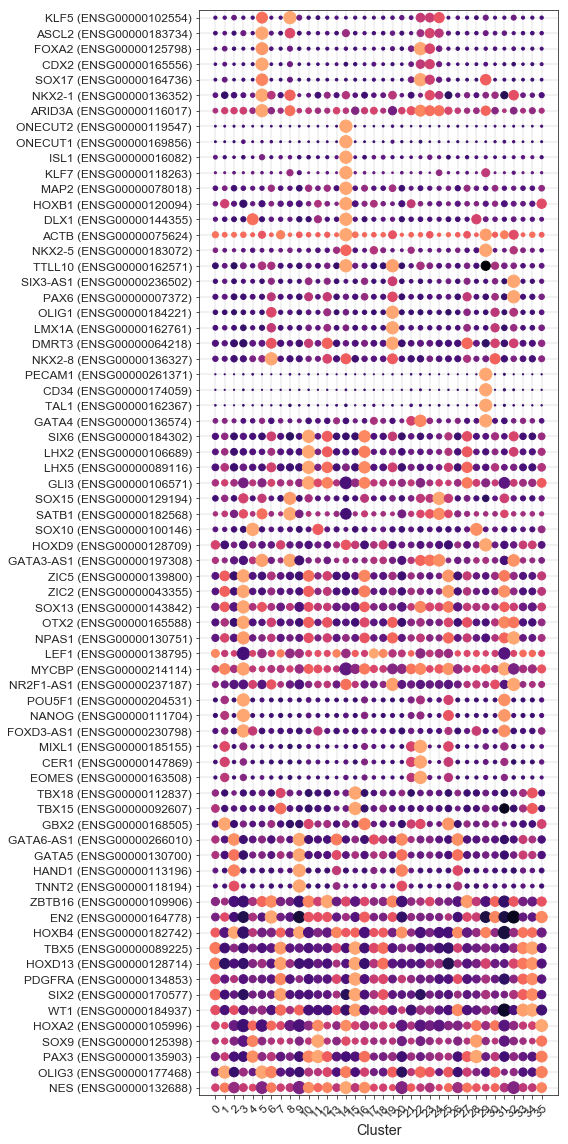

In [44]:
scprep.plot.marker_plot(data_magic, eb_clusters, full_marker_genes, figsize=(12,16))

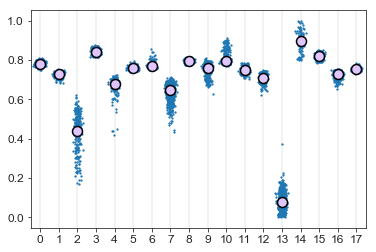

In [31]:
scprep.plot.jitter(clusters, dpt)